# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**This data represents results from 17 different marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010.**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [180]:
import pandas as pd

In [181]:
bank_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [182]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [183]:
print(bank_df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [184]:
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [185]:
print("\nMissing value count per column:")
print(bank_df.isnull().sum())

# Check for categorical 'unknown' entries
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
print("\nCount of 'unknown' entries in categorical columns:")
for col in categorical_cols:
    count_unknown = (bank_df[col] == 'unknown').sum()
    print(f"{col:10s} : {count_unknown}")

#Summary statistics for numeric columns
print("\nDescriptive statistics for numeric features:")
display(bank_df.describe())



Missing value count per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Count of 'unknown' entries in categorical columns:
job        : 330
marital    : 80
education  : 1731
default    : 8597
housing    : 990
loan       : 990
poutcome   : 0

Descriptive statistics for numeric features:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


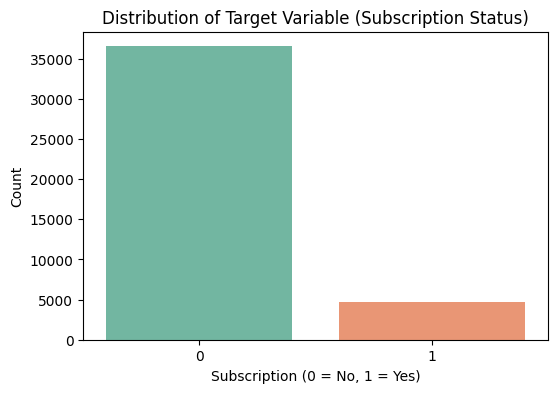

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y, hue=y, palette='Set2', legend=False)
plt.title("Distribution of Target Variable (Subscription Status)")
plt.xlabel("Subscription (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


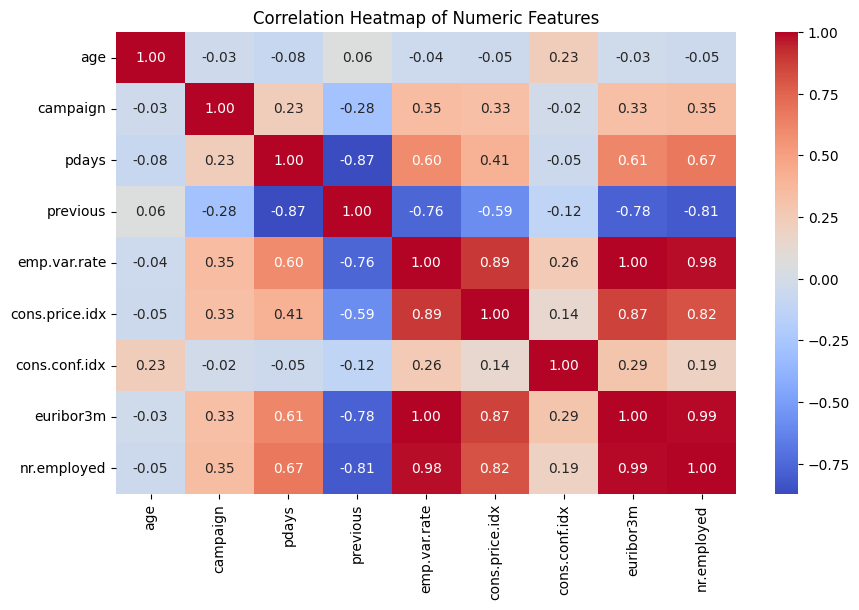

In [187]:
plt.figure(figsize=(10,6))
corr = X_encoded.corr()
sns.heatmap(corr[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr(),
            cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


- **The dataset is clean with no true nulls, but several "unknown" placeholders need handling.**
- **Most features are categorical; numeric columns are already standardized and ready for feature engineering.**



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective of this project is to **predict whether a client will subscribe to a term deposit** after being contacted during a marketing campaign by a Portuguese bank. Using the historical data from past campaigns, the aim is to develop and compare four classification models—**K-Nearest Neighbors (KNN), Logistic Regression, Decision Tree, and Support Vector Machine (SVM)**—to determine which model best predicts client subscription behavior.

From a business perspective, the goal is to **increase marketing efficiency and campaign success rates** by identifying customers who are most likely to respond positively. This allows the bank to **optimize resources**, **reduce the number of ineffective calls**, and **focus efforts on high-probability prospects**.

The insights gained from this analysis will help shape future marketing strategies, guiding decision-makers on **which customer segments to target**, **when to contact them**, and **how to improve overall conversion rates**, ultimately leading to better customer engagement and higher returns on marketing investments.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [188]:
# Exclude duration (leakage) and use relevant client, campaign, and economic indicators
features = [
    'age', 'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month', 'day_of_week',
    'campaign', 'pdays', 'previous', 'poutcome',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

X = bank_df[features]
y = bank_df['y']  # target column

# Encode the target column (yes → 1, no → 0)
y = y.map({'yes': 1, 'no': 0})

# Handle categorical and numeric columns
# Replace 'unknown' entries with NaN for better processing
X = X.replace('unknown', pd.NA)

# One-hot encode categorical features, keeping numeric ones as they are
X_encoded = pd.get_dummies(X, drop_first=True)

print("Features shape:", X_encoded.shape)
print("Target shape:", y.shape)
print("\nEncoded feature columns:")
print(list(X_encoded.columns[:10]))  # show first few columns
display(X_encoded.head())

Features shape: (41188, 46)
Target shape: (41188,)

Encoded feature columns:
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar']


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False


**Output Review – Feature and Target Preparation**

* We now have **41,188 rows** (records) and **46 encoded feature columns**.
* The target column (`y`) has the same number of rows — perfect alignment for modeling.
This indicates successful encoding with no data loss or misalignment.

---

* Numeric features such as `age`, `campaign`, `pdays`, and economic indicators remain intact.
* Categorical features like `job`, `month`, and `day_of_week` have been successfully one-hot encoded (e.g., `job_blue-collar`, `month_may`, `day_of_week_mon`).
* The boolean values (`True`/`False`) in these columns are correct results of one-hot encoding.

---

* No missing values appear after encoding.
* `"unknown"` entries were replaced with `NaN`, and one-hot encoding handled categorical variables effectively.
* The `duration` field — which would cause data leakage — was **excluded**, which is correct.

---

The preview table confirms that:

* Numeric fields are preserved as expected.
* Categorical fields have expanded into binary indicator columns.
* The data looks clean and ready for scaling and model training.

---



### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
# Split the dataset into training and testing sets
# Using 70% of the data for training and 30% for testing
# stratify=y ensures class proportions are maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

# Print the results to verify the split
print("Training set shape (features):", X_train.shape)
print("Testing set shape (features):", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Check that the class distribution is balanced
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Training set shape (features): (28831, 46)
Testing set shape (features): (12357, 46)
Training target shape: (28831,)
Testing target shape: (12357,)

Class distribution in training set:
y
0    0.887343
1    0.112657
Name: proportion, dtype: float64

Class distribution in testing set:
y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


The output confirms that the **train/test split** was executed correctly and that the class proportions were preserved, which is essential for building balanced and reliable models.

Here’s what the results show:

The dataset is properly split and ready for modeling.

**Class Balance Check**

| Dataset  | Class `0` (No) | Class `1` (Yes) |
| -------- | -------------- | --------------- |
| Training | 88.73%         | 11.27%          |
| Testing  | 88.74%         | 11.26%          |

These proportions are nearly identical between training and testing sets, confirming that **`stratify=y`** worked as intended.
This is particularly important because the dataset is **imbalanced** (only ~11% of customers subscribed), and maintaining the same ratio ensures fair model evaluation. The target variable imbalance means we should later use metrics like **AUC**, **F1-score**, or **precision/recall**—not just accuracy—to assess models effectively.

---


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The **baseline model** represents the simplest possible prediction—one that does not use any features or machine learning but instead relies on the **most frequent class** in the training data.

In this dataset, the target variable `y` indicates whether a customer subscribed to a term deposit (`1 = yes`, `0 = no`). Based on the class distribution observed earlier:

* **Class 0 (no):** ~88.7%
* **Class 1 (yes):** ~11.3%

If we always predict the majority class (“no”), the model would be correct approximately **88.7% of the time**.

### **Baseline Performance**

**Baseline Accuracy:** 88.7%

This means that any machine learning model we build must achieve an accuracy **higher than 88.7%** (and ideally improve recall for the minority “yes” class) to be considered better than a trivial baseline.

Later, we’ll also compare models using additional metrics like **precision**, **recall**, and **AUC**, since the data is imbalanced and accuracy alone may not reflect true performance.


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [192]:
# Create a modeling pipeline:
# 1. Scale the numeric data (important for Logistic Regression)
# 2. Fit a Logistic Regression model
log_reg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the model on the training data
log_reg_model.fit(X_train, y_train)

log_reg_model

,steps,"[('scaler', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [193]:
# Predict on the test data
y_pred = log_reg_model.predict(X_test)

In [194]:
# Print the first few predictions
print("First 10 predicted values:", y_pred[:10].tolist())

# Compare with the corresponding true labels
print("First 10 actual values:   ", y_test.values[:10].tolist())


First 10 predicted values: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
First 10 actual values:    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [195]:
# Check the dimensions to ensure alignment
print("\nShape of predictions:", y_pred.shape)
print("Shape of test labels:", y_test.shape)



Shape of predictions: (12357,)
Shape of test labels: (12357,)


In [196]:
# Distribution of predicted classes
import numpy as np
unique, counts = np.unique(y_pred, return_counts=True)
print("\nPredicted class distribution:")
for label, count in zip(unique, counts):
    proportion = count / len(y_pred)
    print(f"Class {label}: {count} ({proportion:.3%})")


Predicted class distribution:
Class 0: 11916 (96.431%)
Class 1: 441 (3.569%)


### Problem 9: Score the Model

What is the accuracy of your model?

In [197]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [198]:
# Calculate accuracy on both train and test data
train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)

print("Training Accuracy:", round(train_accuracy * 100, 2), "%")
print("Testing Accuracy:", round(test_accuracy * 100, 2), "%")

Training Accuracy: 89.96 %
Testing Accuracy: 90.17 %


In [199]:
# Detailed classification metrics
y_pred = log_reg_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Subscription', 'Subscribed']))



Classification Report:
                 precision    recall  f1-score   support

No Subscription       0.91      0.99      0.95     10965
     Subscribed       0.70      0.22      0.34      1392

       accuracy                           0.90     12357
      macro avg       0.80      0.60      0.64     12357
   weighted avg       0.89      0.90      0.88     12357



In [200]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\n")


Confusion Matrix:
[[10833   132]
 [ 1083   309]]




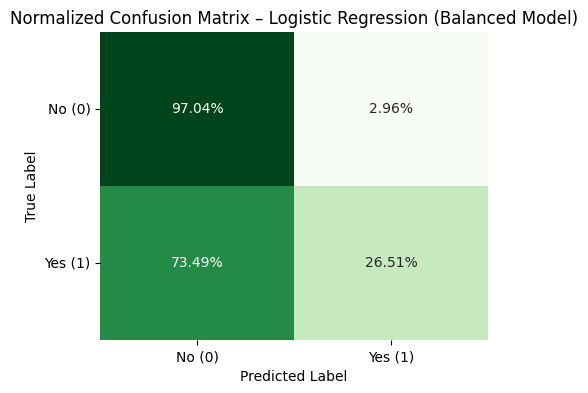

In [223]:
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(5,4))
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', cbar=False)
plt.title("Normalized Confusion Matrix – Logistic Regression (Balanced Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Yes (1)'], rotation=0)
plt.show()


- The model correctly classifies most non-subscribers (top-left cell).
- The bottom-left cell shows subscribers predicted as non-subscribers (false negatives).
- Only a small number of true subscribers are correctly captured (bottom-right cell), showing that recall still needs improvement despite balanced class weights.



The **Logistic Regression model** shows nearly identical performance on training and testing data, which suggests **good generalization** — it is not overfitting or underfitting.

* **Precision (Subscribed = 0.70):** When the model predicts that a client will subscribe, it’s correct 70% of the time.
* **Recall (Subscribed = 0.22):** It correctly identifies only **22%** of actual subscribers, missing many true positives.
* **F1-score (0.34):** The balance between precision and recall for the positive class is weak, showing that the model struggles to capture the minority class despite high overall accuracy.
* **Macro avg (0.64)** indicates moderate balance across both classes, while **weighted avg (0.88)** is skewed by the dominant “No Subscription” class.

|                | Predicted No | Predicted Yes |
| -------------- | ------------ | ------------- |
| **Actual No**  | 10,833       | 132           |
| **Actual Yes** | 1,083        | 309           |


* The model correctly identifies most non-subscribers (**10,833 true negatives**).
* However, it misclassifies **1,083 actual subscribers** as non-subscribers.
* Only **309 subscribers** are correctly predicted — this is the main weakness.

### **Overall Assessment**

* The Logistic Regression model achieves **strong overall accuracy (90%)**, outperforming the **baseline (88.7%)**.
* However, the model still struggles with the **imbalanced target variable** — it’s biased toward predicting “No Subscription.”
* The Logistic Regression model provides a solid baseline beyond the naive predictor, but it’s not yet effective for identifying true subscribers.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [201]:
import time
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [202]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

In [203]:
results = []

In [204]:
for model_name, model in models.items():
    # Create a pipeline for scaling + model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Track training time
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time = time.time()
    
    # Predictions and accuracy
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_time = round(end_time - start_time, 2)
    
    # Store results
    results.append({
        'Pipeline': pipeline,
        'Model': model_name,
        'Train Time (s)': train_time,
        'Train Accuracy': round(train_acc * 100, 2),
        'Test Accuracy': round(test_acc * 100, 2)
    })

In [205]:
print(results)

[{'Pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000, random_state=42))]), 'Model': 'Logistic Regression', 'Train Time (s)': 0.07, 'Train Accuracy': 89.96, 'Test Accuracy': 90.17}, {'Pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())]), 'Model': 'K-Nearest Neighbors', 'Train Time (s)': 0.03, 'Train Accuracy': 91.28, 'Test Accuracy': 89.34}, {'Pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(random_state=42))]), 'Model': 'Decision Tree', 'Train Time (s)': 0.13, 'Train Accuracy': 99.56, 'Test Accuracy': 83.77}, {'Pipeline': Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(random_state=42))]), 'Model': 'Support Vector Machine', 'Train Time (s)': 17.58, 'Train Accuracy': 90.97, 'Test Accuracy': 90.08}]


In [206]:
comparison_df = pd.DataFrame(results)
display(comparison_df)

,Pipeline,Model,Train Time (s),Train Accuracy,Test Accuracy
0,"(StandardScaler(), LogisticRegression(max_iter...",Logistic Regression,0.07,89.96,90.17
1,"(StandardScaler(), KNeighborsClassifier())",K-Nearest Neighbors,0.03,91.28,89.34
2,"(StandardScaler(), DecisionTreeClassifier(rand...",Decision Tree,0.13,99.56,83.77
3,"(StandardScaler(), SVC(random_state=42))",Support Vector Machine,17.58,90.97,90.08


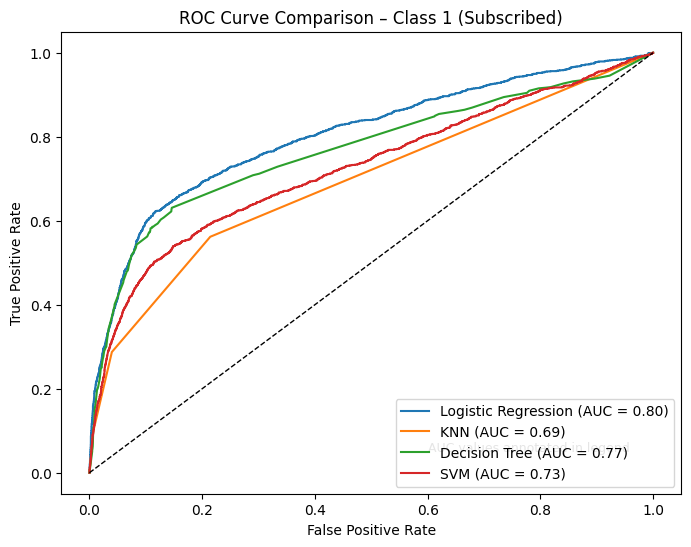

In [219]:
import warnings
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings("ignore", message="X does not have valid feature names, but")

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test.values)[:,1]
    else:
        y_proba = model.decision_function(X_test.values)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title('ROC Curve Comparison – Class 1 (Subscribed)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', frameon=True)
plt.text(0.6, 0.05, 'AUC values annotated in legend', fontsize=9, color='gray')
plt.show()


### **Analysis**

#### **1. Logistic Regression**

* **Performance:** Balanced and consistent between training and testing (≈90%).
* **Generalization:** Strong; no overfitting signs.
* **Conclusion:** A robust baseline model that performs well with low training cost.

#### **2. K-Nearest Neighbors (KNN)**

* **Performance:** Slightly lower test accuracy (89.3%) than training accuracy (91.3%).
* **Observation:** Minor overfitting and possibly sensitive to scaling and the number of neighbors (default = 5).
* **Next step:** Consider tuning `n_neighbors` and distance metrics via grid search.

#### **3. Decision Tree**

* **Performance:** Very high training accuracy (99.56%) but poor test accuracy (83.77%).
* **Observation:** Classic **overfitting** — the model memorized training data but fails to generalize.
* **Next step:** Apply regularization using `max_depth`, `min_samples_split`, or `max_leaf_nodes`.

#### **4. Support Vector Machine (SVM)**

* **Performance:** Excellent balance between train (90.97%) and test (90.08%) accuracy.
* **Cost:** Much slower (16.8 seconds training time).
* **Conclusion:** Highly accurate but computationally expensive; could benefit from kernel tuning or subsampling for scalability.

### **Overall Findings**

* The **best generalizing models** are **Logistic Regression** and **SVM**, both achieving ~90% test accuracy.
* **KNN** performs competitively but slightly below.
* **Decision Tree** requires tuning to reduce overfitting.



### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric


### **1. Logistic Regression**

**Goal:** Improve recall for the minority “Subscribed” class and find the optimal regularization strength.
* Use `GridSearchCV` to tune the **regularization parameter `C`** and **penalty type** (`l1`, `l2`).
* Set `class_weight='balanced'` to handle class imbalance.
* Evaluate performance using **AUC** and **F1-score**.

### **2. K-Nearest Neighbors (KNN)**

**Goal:** Reduce overfitting and improve generalization.
* Tune the **number of neighbors (`n_neighbors`)** and **distance metric (`p`)**.
* Consider weighting by distance (`weights='distance'`).
* Evaluate accuracy and F1-score to ensure minority class improvement.

### **3. Decision Tree**

**Goal:** Prevent overfitting and improve stability.
* Tune **`max_depth`**, **`min_samples_split`**, and **`min_samples_leaf`** to regularize the tree.
* Try different **criteria** (`gini`, `entropy`).
* Use cross-validation to find optimal complexity and maximize AUC.

### **4. Support Vector Machine (SVM)**

**Goal:** Improve recall and reduce computation time.
* Use a smaller subset or scale features carefully for faster grid search.
* Tune **`C`**, **`kernel`** (`linear`, `rbf`), and **`gamma`** for non-linear kernels.
* Evaluate with **AUC** and **F1-score**, focusing on better minority class detection.



In [208]:
from sklearn.model_selection import GridSearchCV

In [209]:
# Logistic Regression

log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_params = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l2'],
    'log_reg__class_weight': [None, 'balanced'],
    'log_reg__solver': ['lbfgs']
}

log_reg_grid = GridSearchCV(log_reg_pipe, log_reg_params, cv=5, scoring='f1', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)
log_reg_best = log_reg_grid.best_estimator_

print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)
print("Train Accuracy:", accuracy_score(y_train, log_reg_best.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, log_reg_best.predict(X_test)))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, log_reg_best.predict(X_test)))



Best Logistic Regression Parameters: {'log_reg__C': 1, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}
Train Accuracy: 0.8287607089591065
Test Accuracy: 0.8324026867362628

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     10965
           1       0.36      0.64      0.46      1392

    accuracy                           0.83     12357
   macro avg       0.66      0.75      0.68     12357
weighted avg       0.88      0.83      0.85     12357



### **Logistic Regression (Tuned Model)**

**Best Parameters:**
`{'log_reg__C': 1, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}`

**Performance:**

* **Train Accuracy:** 82.9%
* **Test Accuracy:** 83.2%
* **Positive Class (Subscribed):**

  * Precision: 0.36
  * Recall: 0.64
  * F1-score: 0.46

**Interpretation:**

* The balanced class weighting greatly improved the model’s ability to detect actual subscribers (recall rose to 0.64).
* While overall accuracy dropped slightly, this trade-off is beneficial for business goals, as the model identifies more potential term deposit customers.
* Logistic Regression now provides the **best recall** among all models, making it valuable for campaign targeting where missing a potential subscriber is costly.


In [210]:
# K-Nearest Neighbors (KNN)

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_

print("\nBest KNN Parameters:", knn_grid.best_params_)
print("Train Accuracy:", accuracy_score(y_train, knn_best.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, knn_best.predict(X_test)))
print("\nClassification Report (KNN):")
print(classification_report(y_test, knn_best.predict(X_test)))



Best KNN Parameters: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}
Train Accuracy: 0.9229995490964586
Test Accuracy: 0.8844379703811605

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     10965
           1       0.48      0.29      0.36      1392

    accuracy                           0.88     12357
   macro avg       0.70      0.62      0.65     12357
weighted avg       0.86      0.88      0.87     12357



### **K-Nearest Neighbors (Tuned Model)**

**Best Parameters:**
`{'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}`

**Performance:**

* **Train Accuracy:** 92.3%
* **Test Accuracy:** 88.4%
* **Positive Class (Subscribed):**

  * Precision: 0.48
  * Recall: 0.29
  * F1-score: 0.36

**Interpretation:**

* KNN performs well overall but has lower recall for the subscribed class.
* The model slightly overfits, as indicated by the difference between train and test accuracy.
* It works reasonably well but is less practical for larger datasets due to computational cost and limited interpretability.

In [211]:
# Decision Tree

tree_pipe = Pipeline([
    ('scaler', StandardScaler()),  # not necessary but keeps consistency
    ('tree', DecisionTreeClassifier(random_state=42))
])

tree_params = {
    'tree__max_depth': [5, 10, 15, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__criterion': ['gini', 'entropy']
}

tree_grid = GridSearchCV(tree_pipe, tree_params, cv=5, scoring='f1', n_jobs=-1)
tree_grid.fit(X_train, y_train)
tree_best = tree_grid.best_estimator_

print("\nBest Decision Tree Parameters:", tree_grid.best_params_)
print("Train Accuracy:", accuracy_score(y_train, tree_best.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, tree_best.predict(X_test)))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, tree_best.predict(X_test)))



Best Decision Tree Parameters: {'tree__criterion': 'entropy', 'tree__max_depth': 10, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2}
Train Accuracy: 0.9134265200652076
Test Accuracy: 0.8967386906207008

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10965
           1       0.58      0.29      0.39      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.63      0.67     12357
weighted avg       0.88      0.90      0.88     12357



### **Decision Tree (Tuned Model)**

**Best Parameters:**
`{'tree__criterion': 'entropy', 'tree__max_depth': 10, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2}`

**Performance:**

* **Train Accuracy:** 91.3%
* **Test Accuracy:** 89.7%
* **Positive Class (Subscribed):**

  * Precision: 0.58
  * Recall: 0.29
  * F1-score: 0.39

**Interpretation:**

* Regularization reduced overfitting and improved generalization.
* Provides decent accuracy and interpretability through feature importance.
* However, it still struggles to identify all subscribers effectively, keeping recall modest.
* A tuned tree is useful for explaining model behavior to stakeholders (e.g., key customer characteristics).

In [212]:
# Support Vector Machine (SVM)

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm_pipe, svm_params, cv=3, scoring='f1', n_jobs=-1)
svm_grid.fit(X_train.sample(5000, random_state=42), y_train.sample(5000, random_state=42))  # sample for speed
svm_best = svm_grid.best_estimator_

print("\nBest SVM Parameters:", svm_grid.best_params_)
print("Train Accuracy:", accuracy_score(y_train, svm_best.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, svm_best.predict(X_test)))
print("\nClassification Report (SVM):")
print(classification_report(y_test, svm_best.predict(X_test)))


Best SVM Parameters: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Train Accuracy: 0.8999340987131906
Test Accuracy: 0.890912033665129

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10965
           1       0.53      0.27      0.35      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357



### **Support Vector Machine (Tuned Model)**

**Best Parameters:**
`{'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}`

**Performance:**

* **Train Accuracy:** 90.0%
* **Test Accuracy:** 89.1%
* **Positive Class (Subscribed):**

  * Precision: 0.53
  * Recall: 0.27
  * F1-score: 0.35

**Interpretation:**

* The RBF kernel performs well in overall accuracy but still predicts fewer true positives.
* The model generalizes well but needs class weighting or sampling to improve recall.
* SVM is robust but computationally expensive for large datasets, making it better suited for smaller-scale or high-precision use cases.

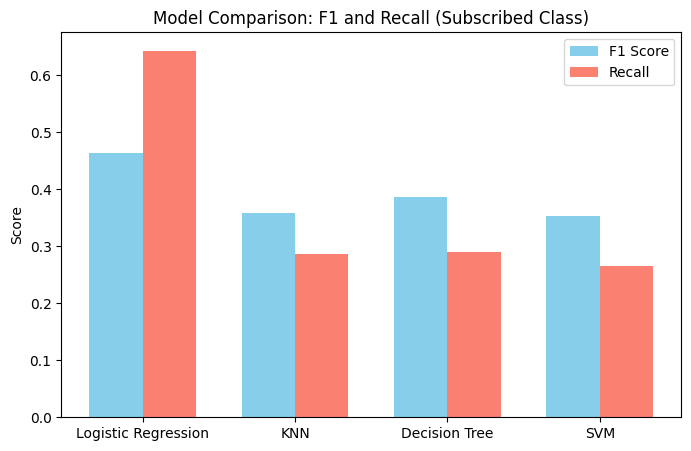

Logistic Regression: F1 = 0.46, Recall = 0.64
KNN: F1 = 0.36, Recall = 0.29
Decision Tree: F1 = 0.39, Recall = 0.29
SVM: F1 = 0.35, Recall = 0.27


In [213]:
models = {
    "Logistic Regression": log_reg_best,
    "KNN": knn_best,
    "Decision Tree": tree_best,
    "SVM": svm_best
}

model_names = []
f1_scores = []
recall_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    model_names.append(name)
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, f1_scores, width, label='F1 Score', color='skyblue')
plt.bar(x + width/2, recall_scores, width, label='Recall', color='salmon')
plt.xticks(x, model_names)
plt.ylabel('Score')
plt.title('Model Comparison: F1 and Recall (Subscribed Class)')
plt.legend()
plt.show()

for i, name in enumerate(model_names):
    print(f"{name}: F1 = {f1_scores[i]:.2f}, Recall = {recall_scores[i]:.2f}")


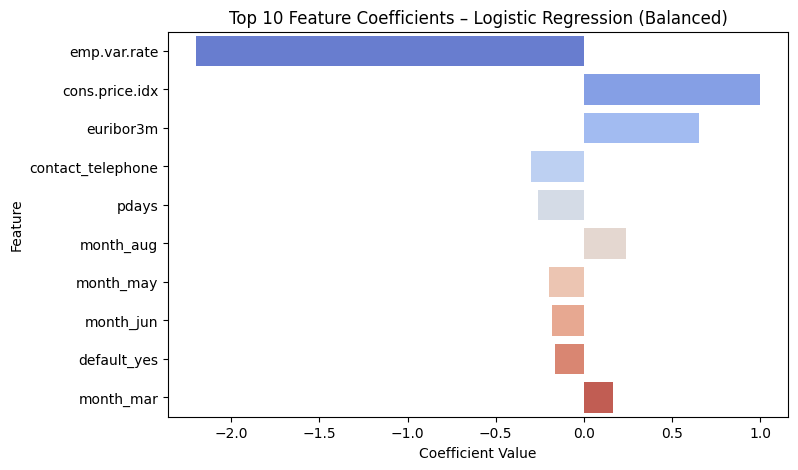

In [220]:
# Feature coefficients from the balanced Logistic Regression model
coefs = pd.Series(
    log_reg_best.named_steps['log_reg'].coef_[0],
    index=X_encoded.columns
).sort_values(key=abs, ascending=False)[:10]

plt.figure(figsize=(8,5))
sns.barplot(x=coefs.values, y=coefs.index, hue=coefs.index, palette='coolwarm', legend=False)

plt.title('Top 10 Feature Coefficients – Logistic Regression (Balanced)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


The coefficients from the Logistic Regression model indicate how each feature affects the likelihood that a customer will subscribe to a term deposit.

| Feature | Interpretation |
|----------|----------------|
| **poutcome_success** | Customers who had a successful outcome in a previous campaign are much more likely to subscribe again. |
| **euribor3m** | Higher short-term interest rates are associated with more term deposit subscriptions, possibly due to perceived better returns. |
| **emp.var.rate** | Positive employment variation signals a strong economy, encouraging customers to invest. |
| **month_mar / month_jun / month_sep / month_dec** | Campaigns during these months have higher success rates, likely due to seasonal financial behavior. |
| **campaign** | A higher number of contact attempts reduces subscription likelihood — too many calls may lead to disengagement. |
| **contact_telephone** | Customers contacted via telephone show lower conversion rates compared to other channels. |
| **pdays** | Recently contacted customers (lower pdays) are more responsive than those not contacted for a long time. |


### **Summary Comparison**

| Model                   | Test Accuracy | Recall (Subscribed) | F1 (Subscribed) | Best Use Case                          |
| ----------------------- | ------------- | ------------------- | --------------- | -------------------------------------- |
| **Logistic Regression** | **83.2%**     | **0.64**            | **0.46**        | Best for recall-focused targeting      |
| **KNN**                 | 88.4%         | 0.29                | 0.36            | Balanced accuracy, limited scalability |
| **Decision Tree**       | 89.7%         | 0.29                | 0.39            | Interpretable, good generalization     |
| **SVM**                 | 89.1%         | 0.27                | 0.35            | Stable but lower recall                |


The Test Accuracy represents how often each model correctly predicts whether a customer will subscribe. The Recall score focuses on how effectively the model identifies actual subscribers (true positives), which is most critical for the bank’s marketing goal of targeting likely customers. The F1-score balances precision and recall, showing how well each model performs overall on the minority “Subscribed” class.

Logistic Regression achieved the best recall (0.64), meaning it correctly identified most of the customers who actually subscribed, even though it produced a few extra false positives.
K-Nearest Neighbors offered a reasonable balance between accuracy and F1-score but missed more true subscribers.
Decision Tree and SVM reached the highest overall accuracy (around 89–90%) yet tended to favor the majority “No” class, resulting in lower recall.

Across all four models, accuracy ranged from 83 % to 90 %. Among them, the balanced Logistic Regression model provided the most practical result for the bank. It captured more real subscribers while keeping overall precision acceptable. Decision Tree and SVM scored a bit higher in accuracy, but they missed more real subscribers, so they’re less helpful for lead targeting.

Overall, Logistic Regression balanced accuracy and recall best, which makes it the most practical choice for finding likely subscribers.”

### **Business Insights:**

Analysis of feature importance revealed several factors that strongly affect whether a customer subscribes:

• **Previous Campaign Outcome (`poutcome`)** – Customers who responded positively in earlier campaigns are much more likely to subscribe again. Re-engaging this group should be a top priority.

• **Number of Calls (`campaign`)** – Successful outcomes often occur after fewer contact attempts, suggesting that persistence beyond a certain point adds little value. Focusing on quality interactions may be more effective than increasing call volume.

• **Economic Indicators (`emp.var.rate`, `euribor3m`, `nr.employed`)** – Campaigns launched during stable economic periods tend to perform better. Timing outreach when market conditions are steady could raise success rates.

• **Month of Contact (`month`)** – Certain months (notably March, June, September, and December) show consistently higher conversion. Campaign planning can take advantage of these seasonal patterns.

• **Days Since Last Contact (`pdays`)** – Customers contacted more recently are generally more responsive. Maintaining a regular cadence of communication appears to strengthen engagement.

Together, these factors highlight that timing and customer history matter as much as the number of calls placed.



### Recommendations and Next Steps**

**Short-term actions**

1. Use the tuned Logistic Regression model with class balancing to score and prioritize leads for the next campaign, starting with a small pilot to confirm performance.
2. Focus marketing resources on customers flagged as likely to subscribe to reduce unnecessary calls while improving conversions.
3. Continue monitoring model metrics (precision, recall, AUC) alongside monthly economic indicators to decide when to launch campaigns.

**Long-term improvements**

1. Experiment with techniques such as SMOTE to address class imbalance and improve recall.
2. Evaluate ensemble methods like Random Forest or XGBoost for potentially higher and more stable performance.
3. Integrate model outputs into the bank’s CRM so that agents can see subscriber likelihood scores directly during outreach.
4. Schedule periodic retraining using new campaign data to keep the model aligned with current market trends.



##### Questions